#fuentes de referencia
* https://www.epdata.es/datos/mortalidad-estimada-registrada-cualquier-causa-coincidiendo-epidemia-coronavirus/521/espana/106
* https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html
* https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html

In [9]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

# Extracción de los datos

In [14]:
path_momo='https://momo.isciii.es/public/momo/data'

In [15]:
row_momo = pd.read_csv(path_momo)

In [16]:
row_momo

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-01,1283,1283.0,1283.000000,1201.5,1066.1,1592.50
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-02,1168,1168.0,1168.000000,1201.5,1066.1,1592.50
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-03,1219,1219.0,1219.000000,1200.5,1066.1,1590.85
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-04,1248,1248.0,1248.000000,1207.0,1066.1,1532.50
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-05,1229,1229.0,1229.000000,1207.0,1066.1,1503.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179755,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-03-14,0,0.0,0.164525,0.0,0.0,3.00
179756,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-03-15,1,1.0,1.228816,0.0,0.0,3.00
179757,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-03-16,0,0.0,0.336567,0.0,0.0,3.00
179758,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-03-17,0,0.0,1.697217,0.0,0.0,3.00


In [17]:
row_momo.columns

Index(['ambito', 'cod_ambito', 'cod_ine_ambito', 'nombre_ambito', 'cod_sexo',
       'nombre_sexo', 'cod_gedad', 'nombre_gedad', 'fecha_defuncion',
       'defunciones_observadas', 'defunciones_observadas_lim_inf',
       'defunciones_observadas_lim_sup', 'defunciones_esperadas',
       'defunciones_esperadas_q01', 'defunciones_esperadas_q99'],
      dtype='object')

In [18]:
row_momo['cod_ambito'].unique()

array([nan, 'AN', 'AR', 'AS', 'IB', 'CN', 'CB', 'CL', 'CM', 'CT', 'VC',
       'EX', 'GA', 'MD', 'MC', 'NC', 'PV', 'RI', 'CE', 'ML'], dtype=object)

In [19]:
observadas = 'defunciones_observadas'
esperadas = 'defunciones_esperadas'
acum_obs = 'acum_observadas'
acum_esp = 'acum_esperadas'

En este punto disponemos de un pandas `row_momo`con los datos del repositorio y 4 variables para ayudar a su tratamientos

In [7]:
momo_ccaa=row_momo.groupby(['fecha_defuncion','cod_ambito']).sum().reset_index()

In [8]:
momo_ccaa['fecha_defuncion'] = pd.to_datetime(momo_ccaa['fecha_defuncion'])

In [10]:
datos = row_momo.loc[(row_momo['cod_ambito']=='EX') & (row_momo['cod_sexo']=='all') & (row_momo['nombre_gedad']=='todos')].copy()
datos.loc[:,'acum_esperadas'] = datos.loc[:,esperadas].cumsum()
datos.loc[:,'acum_observadas'] = datos.loc[:,observadas].cumsum()
datos['fecha_defuncion'] = pd.to_datetime(datos['fecha_defuncion'])

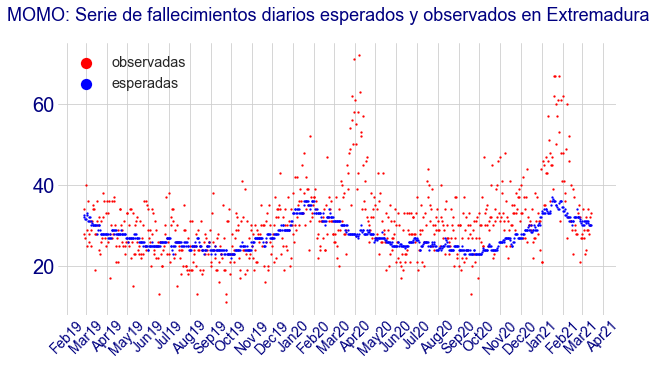

In [11]:
color_titulos = 'navy'
colores = sns.color_palette("Blues_r", 5)

plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(1,1,1,)


#colors = cm.RdYlBu_r(datos[casos_nuevos]/datos[casos_nuevos].max())


#ax1.fill_between(datos['date'],datos[IA],color='navy',lw=5,alpha=.3)

ax1.yaxis.set_tick_params(labelsize=20,labelcolor='navy')
ax1.xaxis.set_tick_params(labelsize=14,rotation=45,labelcolor='navy',width=0)
#ax1.set_title(titulo_IA,size=20,color='navy')
ax1.scatter(datos['fecha_defuncion'],datos[observadas],color='red',s=5,lw=.05,label='observadas')
ax1.scatter(datos['fecha_defuncion'],datos[esperadas],color='blue',s=5,lw=.05,label='esperadas')
#ax1.plot(momo_ccaa['fecha_defuncion'],momo_ccaa[observadas],color='red',lw=.5,label='ratio ia14 a 7 días')
#ax2.plot(datos['date'],datos[clave_ratio],color='red',lw=.5,label='ratio ia14 a 7 días')

fmt = '%00.0f' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
#ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

XmajorFmt = DateFormatter('%-b%y')
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(DayLocator([1]))
#ax1.set_xticks(ax1.get_xticks()[1:-1])

legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large',markerscale=5)

ax1.grid(True,axis='both')
f.suptitle('MOMO: Serie de fallecimientos diarios esperados y observados en Extremadura',fontsize=18,color='navy')
style = dict(size=20, color=color_titulos,weight='normal')
([spine.set_visible(False) for spine in ax1.spines.values()])

#f.tight_layout(w_pad=0,h_pad=2,pad=1)

#f.tight_layout()
f.savefig('img/momo_diario_ex.png',dpi=200,bbox_inches='tight')

In [12]:
datos = row_momo.loc[(row_momo['cod_ambito']=='MD') & (row_momo['cod_sexo']=='all') & (row_momo['nombre_gedad']=='todos')].copy()
datos.loc[:,'acum_esperadas'] = datos.loc[:,esperadas].cumsum()
datos.loc[:,'acum_observadas'] = datos.loc[:,observadas].cumsum()
datos['fecha_defuncion'] = pd.to_datetime(datos['fecha_defuncion'])

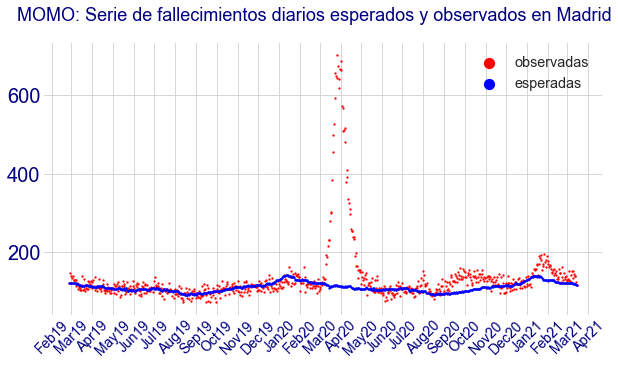

In [13]:

color_titulos = 'navy'
colores = sns.color_palette("Blues_r", 5)

plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(1,1,1,)


#colors = cm.RdYlBu_r(datos[casos_nuevos]/datos[casos_nuevos].max())


#ax1.fill_between(datos['date'],datos[IA],color='navy',lw=5,alpha=.3)

ax1.yaxis.set_tick_params(labelsize=20,labelcolor='navy')
ax1.xaxis.set_tick_params(labelsize=14,rotation=45,labelcolor='navy',width=0)
#ax1.set_title(titulo_IA,size=20,color='navy')
ax1.scatter(datos['fecha_defuncion'],datos[observadas],color='red',s=5,lw=.05,label='observadas')
ax1.scatter(datos['fecha_defuncion'],datos[esperadas],color='blue',s=5,lw=.05,label='esperadas')
#ax1.plot(momo_ccaa['fecha_defuncion'],momo_ccaa[observadas],color='red',lw=.5,label='ratio ia14 a 7 días')
#ax2.plot(datos['date'],datos[clave_ratio],color='red',lw=.5,label='ratio ia14 a 7 días')

fmt = '%00.0f' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
#ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

XmajorFmt = DateFormatter('%-b%y')
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(DayLocator([1]))
#ax1.set_xticks(ax1.get_xticks()[1:-1])

legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large',markerscale=5)

ax1.grid(True,axis='both')
f.suptitle('MOMO: Serie de fallecimientos diarios esperados y observados en Madrid',fontsize=18,color='navy')
style = dict(size=20, color=color_titulos,weight='normal')
([spine.set_visible(False) for spine in ax1.spines.values()])

#f.tight_layout(w_pad=0,h_pad=2,pad=1)

#f.tight_layout()
f.savefig('img/momo_diario_madrid.png',dpi=200,bbox_inches='tight')

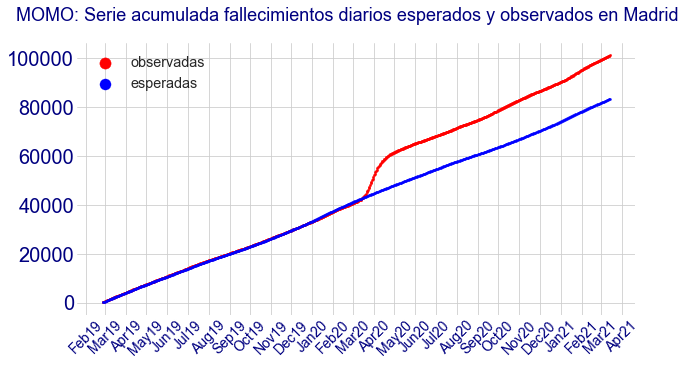

In [14]:

color_titulos = 'navy'
colores = sns.color_palette("Blues_r", 5)

plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(1,1,1,)



#colors = cm.RdYlBu_r(datos[casos_nuevos]/datos[casos_nuevos].max())


#ax1.fill_between(datos['date'],datos[IA],color='navy',lw=5,alpha=.3)

ax1.yaxis.set_tick_params(labelsize=20,labelcolor='navy')
ax1.xaxis.set_tick_params(labelsize=14,rotation=45,labelcolor='navy',width=0)
#ax1.set_title(titulo_IA,size=20,color='navy')
ax1.scatter(datos['fecha_defuncion'],datos[acum_obs],color='red',s=5,lw=.5,label='observadas')
ax1.scatter(datos['fecha_defuncion'],datos[acum_esp],color='blue',s=5,lw=.2,label='esperadas')
#ax1.plot(momo_ccaa['fecha_defuncion'],momo_ccaa[observadas],color='red',lw=.5,label='ratio ia14 a 7 días')
#ax2.plot(datos['date'],datos[clave_ratio],color='red',lw=.5,label='ratio ia14 a 7 días')

fmt = '%00.0f' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
#ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

XmajorFmt = DateFormatter('%-b%y')
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(DayLocator([1]))
#ax1.set_xticks(ax1.get_xticks()[1:-1])

legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large',markerscale=5)

ax1.grid(True,axis='both')
f.suptitle('MOMO: Serie acumulada fallecimientos diarios esperados y observados en Madrid',fontsize=18,color='navy')
style = dict(size=20, color=color_titulos,weight='normal')
([spine.set_visible(False) for spine in ax1.spines.values()])

#f.tight_layout(w_pad=0,h_pad=2)

#f.tight_layout()
f.savefig('img/momo_acum_madrid.png',dpi=200,bbox_inches='tight')

In [15]:
datos = row_momo.loc[(row_momo['cod_sexo']=='all') & (row_momo['nombre_gedad']=='todos')& (row_momo['ambito']=='ccaa')]

In [16]:
datos['fecha_defuncion'] = pd.to_datetime(datos['fecha_defuncion'])

<ipython-input-16-d0afacdc08a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['fecha_defuncion'] = pd.to_datetime(datos['fecha_defuncion'])


In [17]:
#datos = pd.melt(datos, id_vars=['nombre_ambito','fecha_defuncion'], value_vars=[observadas, esperadas])

In [18]:
datos

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
8988,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2019-02-26,225,225.000000,225.000000,227.5,177.35,301.95
8989,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2019-02-27,239,239.000000,239.000000,227.0,177.35,301.95
8990,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2019-02-28,218,218.000000,218.000000,224.5,176.80,300.85
8991,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2019-03-01,240,240.000000,240.000000,222.5,176.80,299.20
8992,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2019-03-02,186,186.000000,186.000000,221.5,176.80,299.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171516,ccaa,ML,19.0,Melilla,all,todos,all,todos,2021-03-11,1,1.000000,1.447841,1.0,0.00,4.31
171517,ccaa,ML,19.0,Melilla,all,todos,all,todos,2021-03-12,1,0.351227,1.966254,1.0,0.00,4.31
171518,ccaa,ML,19.0,Melilla,all,todos,all,todos,2021-03-13,2,1.145415,3.159433,1.0,0.00,5.00
171519,ccaa,ML,19.0,Melilla,all,todos,all,todos,2021-03-14,3,2.000000,5.548815,1.0,0.00,5.00


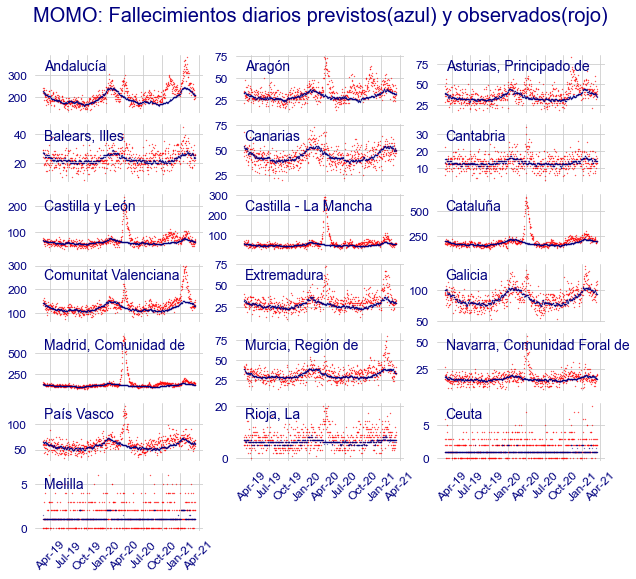

In [19]:
# Creamos la figura desde Matplotlib
#plt.figure()
color_observadas = 'red'
color_esperadas = 'navy'
observadas = 'defunciones_observadas'
esperadas = 'defunciones_esperadas'
acum_obs = 'acum_observadas'
acum_esp = 'acum_esperadas'
colores = sns.color_palette("Blues_r", 5)
titulo='MOMO: Fallecimientos diarios previstos(azul) y observados(rojo)'
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='nombre_ambito',hue='nombre_ambito',col_wrap=3,aspect=2.5, 
                      margin_titles=False,height=1.2,sharey=False)

# Título


#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-b-%-y')
def grafica(x, color, label):
    df_datos= datos.loc[datos['nombre_ambito'] == label].copy()
    df_datos.loc[:,'acum_esperadas'] = df_datos.loc[:,esperadas].cumsum()
    df_datos.loc[:,'acum_observadas'] = df_datos.loc[:,observadas].cumsum()
    
    ax1 = plt.gca()
    ax1.xaxis_date()
    
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.05, .8, label, fontweight="light", color=color_titulos,
            ha="left", va="center", size=14,transform=ax1.transAxes)
    #ax1.set_ylim(0,1000)
    #ax1.set_yticks([0,250,500,750,1000])
    
    #ax1.set_yticks([])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.scatter(df_datos['fecha_defuncion'], df_datos[observadas],s=0.1,color=color_observadas)
    ax1.scatter(df_datos['fecha_defuncion'], df_datos[esperadas],s=0.05,color=color_esperadas)
    
g.map(grafica,'nombre_ambito')


g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=20,color='navy')
g.fig.subplots_adjust(top=.9,wspace=0.2,hspace=0.2)
plt.savefig('img/momo_dif_diaria.png',dpi=288)  
#plt.tight_layout()
plt.show()


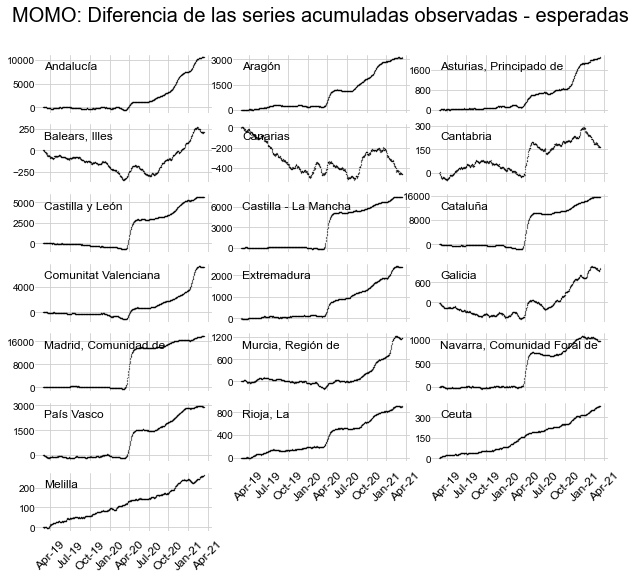

In [20]:
# Creamos la figura desde Matplotlib
#plt.figure()
color_observadas = 'black'
color_esperadas = 'grey'
colores = sns.color_palette("Blues_r", 5)
color_ejes ='black'
color_titulos = 'black'
titulo='MOMO: Diferencia de las series acumuladas observadas - esperadas'
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='nombre_ambito',hue='nombre_ambito',col_wrap=3,aspect=2.5, 
                      margin_titles=False,height=1.2,sharey=False)

# Título


#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-b-%-y')
def grafica(x, color, label):
    ax1 = plt.gca()
    ax1.xaxis_date()
    df_datos= datos.loc[datos['nombre_ambito'] == label].copy()
    df_datos.loc[:,'acum_esperadas'] = df_datos.loc[:,esperadas].cumsum()
    df_datos.loc[:,'acum_observadas'] = df_datos.loc[:,observadas].cumsum()
    
    
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.05, .8, label, fontweight="light", color=color_titulos,
            ha="left", va="center", size=12,transform=ax1.transAxes)
    #ax1.set_ylim(0,1000)
    #ax1.set_yticks([0,250,500,750,1000])
    
    #ax1.set_yticks([])
    ax1.yaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes,pad=-5)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.scatter(df_datos['fecha_defuncion'], df_datos[acum_obs]-df_datos[acum_esp],s=0.05,color=color_observadas)
    #ax1.scatter(df_datos['fecha_defuncion'], df_datos[acum_esp]/1000,s=0.05,color=color_esperadas)
    
g.map(grafica,'nombre_ambito')


g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=20,color=color_titulos)
g.fig.subplots_adjust(top=.9,wspace=0.12,hspace=0.2)
plt.savefig('img/momo_dif_acum.png',dpi=288)  
#plt.tight_layout()
plt.show()


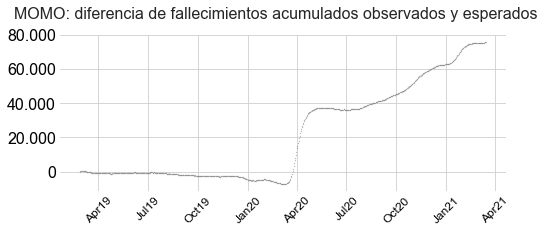

In [21]:


datos = row_momo.loc[(row_momo['ambito']=='nacional') & (row_momo['cod_sexo']=='all') & (row_momo['nombre_gedad']=='todos')].copy()
datos.loc[:,'acum_esperadas'] = datos.loc[:,esperadas].cumsum()
datos.loc[:,'acum_observadas'] = datos.loc[:,observadas].cumsum()
datos['fecha_defuncion'] = pd.to_datetime(datos['fecha_defuncion'])
titulo = 'MOMO: diferencia de fallecimientos acumulados observados y esperados'

color_titulos = 'black'
color_ejes='black'
color_linea ='gray'
colores = sns.color_palette("Blues_r", 5)

plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(8,3))
ax1 = f.add_subplot(1,1,1,)



ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_ejes)
ax1.xaxis.set_tick_params(labelsize=12,rotation=45,labelcolor=color_ejes,width=0)

ax1.scatter(datos['fecha_defuncion'], datos[acum_obs]-datos[acum_esp],s=.05,color=color_linea)

def y_fmt(x, y):
    return '{:0,.0f}'.format(x).replace(',', '.')


ax1.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax1.set_yticks([0,20000,40000,60000,80000])

XmajorFmt = DateFormatter('%-b%y')
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(MonthLocator([1,4,7,10]))
#ax1.set_xticks(ax1.get_xticks()[1:-1])

#legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large')

ax1.grid(True,axis='both')
f.suptitle(titulo,fontsize=16)

style = dict(size=20, color=color_titulos,weight='normal')
([spine.set_visible(False) for spine in ax1.spines.values()])
#f.tight_layout(top=.9,w_pad=0,h_pad=2)
f.subplots_adjust(top=.85,wspace=0.12,hspace=0.2)
#f.tight_layout()
f.savefig('img/MOMO_acum_dif.png',dpi=200,bbox_inches='tight')

# Vamos comparar con la serie de sanidad

In [22]:
path_fallecidos_sanidad = '~/Documents/proyectos/covid/sanidad_fallecidos/csv/datos_fallecidos_sanidad.csv'

In [23]:
fallecidos_sanidad = pd.read_csv(path_fallecidos_sanidad,sep=',')

In [24]:
fallecidos_sanidad.columns

Index(['ccaa', 'fallecidos', 'fecha'], dtype='object')

In [25]:
fallecidos_sanidad.columns = ['ccaa', 'fallecidos_sanidad', 'fecha']

In [26]:
fallecidos_sanidad['ccaa'].unique()

array(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias',
       'Cantabria', 'Castilla La Mancha', 'Castilla y León', 'Cataluña',
       'Ceuta', 'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid',
       'Melilla', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja'],
      dtype=object)

In [27]:
dict_nombres = {'Andalucía':'Andalucía', 'Aragón':'Aragón', 'Asturias, Principado de':'Asturias',
       'Balears, Illes':'Baleares', 'Canarias':'Canarias', 'Cantabria':'Cantabria', 'Castilla y León':'Castilla y León',
       'Castilla - La Mancha':'Castilla La Mancha', 'Cataluña':'Cataluña', 'Comunitat Valenciana':'C. Valenciana',
       'Extremadura':'Extremadura', 'Galicia':'Galicia', 'Madrid, Comunidad de':'Madrid',
       'Murcia, Región de':'Murcia', 'Navarra, Comunidad Foral de':'Navarra', 'País Vasco':'País Vasco',
       'Rioja, La':'La Rioja', 'Ceuta':'Ceuta', 'Melilla':'Melilla'}

In [28]:
datos = row_momo.loc[(row_momo['ambito']=='ccaa') & (row_momo['cod_sexo']=='all') & (row_momo['nombre_gedad']=='todos')].copy()
#datos.loc[:,'acum_esperadas'] = datos.loc[:,esperadas].cumsum()
#datos.loc[:,'acum_observadas'] = datos.loc[:,observadas].cumsum()
datos['fecha_defuncion'] = pd.to_datetime(datos['fecha_defuncion'])
datos = datos.loc[datos['fecha_defuncion'] > datetime(year=2020,month=1,day=1),:]

In [29]:
datos['ccaa'] = datos['nombre_ambito'].apply(lambda x : dict_nombres[x])

In [30]:
datos['fecha'] = datos['fecha_defuncion'].apply(lambda x: x.strftime('%-d/%-m/%Y'))

In [31]:
datos.columns

Index(['ambito', 'cod_ambito', 'cod_ine_ambito', 'nombre_ambito', 'cod_sexo',
       'nombre_sexo', 'cod_gedad', 'nombre_gedad', 'fecha_defuncion',
       'defunciones_observadas', 'defunciones_observadas_lim_inf',
       'defunciones_observadas_lim_sup', 'defunciones_esperadas',
       'defunciones_esperadas_q01', 'defunciones_esperadas_q99', 'ccaa',
       'fecha'],
      dtype='object')

In [32]:
datos = datos[['fecha','ccaa',
       'defunciones_observadas','defunciones_esperadas']]

In [33]:
datos['ccaa'].unique()

array(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias',
       'Cantabria', 'Castilla y León', 'Castilla La Mancha', 'Cataluña',
       'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid', 'Murcia',
       'Navarra', 'País Vasco', 'La Rioja', 'Ceuta', 'Melilla'],
      dtype=object)

In [34]:
fallecidos_sanidad

,ccaa,fallecidos_sanidad,fecha
0,Andalucía,912,16/4/2020
1,Aragón,543,16/4/2020
2,Asturias,168,16/4/2020
3,Baleares,131,16/4/2020
4,Canarias,107,16/4/2020
...,...,...,...
4821,Melilla,76,16/3/2021
4822,Murcia,1541,16/3/2021
4823,Navarra,1111,16/3/2021
4824,País Vasco,3842,16/3/2021


In [35]:
fallecidos_completo = pd.merge(datos, fallecidos_sanidad, how='left', on=["ccaa", "fecha"])
fallecidos_completo['fecha'] = pd.to_datetime(fallecidos_completo['fecha'],format='%d/%m/%Y')

In [36]:
#fallecidos_completo['fallecidos_sanidad'] = fallecidos_completo['fallecidos_sanidad'].fillna(method='pad')
#fallecidos_completo['fallecidos_sanidad'] = fallecidos_completo['fallecidos_sanidad'].fillna(np.NaN)
#fallecidos_completo['fallecidos_sanidad'] = fallecidos_completo['fallecidos_sanidad'].fillna(0)

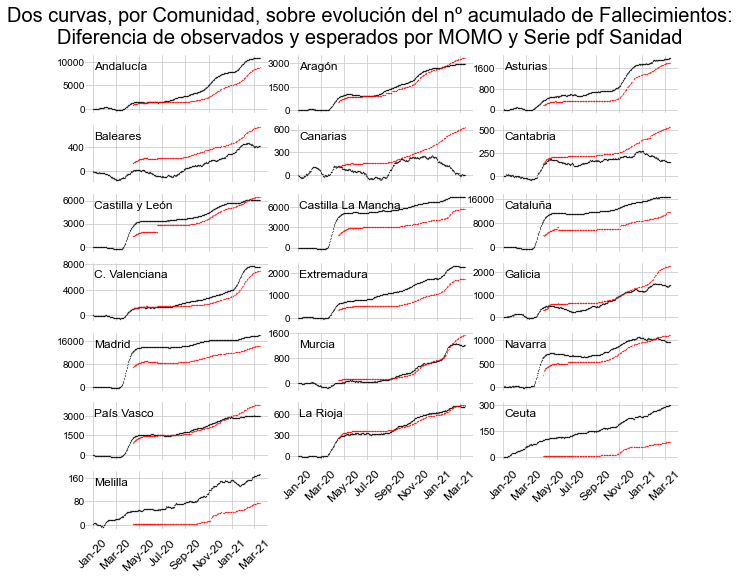

In [37]:
# Creamos la figura desde Matplotlib
#plt.figure()

observadas = 'defunciones_observadas'
esperadas = 'defunciones_esperadas'
acum_obs = 'acum_observadas'
acum_esp = 'acum_esperadas'
acum_sanidadz = 'acum_sanidad'
acum_sanidad = 'fallecidos_sanidad'

color_observadas = 'black'
color_esperadas = 'grey'
color_sanidad = 'red'
colores = sns.color_palette("Blues_r", 5)
color_ejes ='black'
color_titulos = 'black'
titulo = 'Dos curvas, por Comunidad, sobre evolución del nº acumulado de Fallecimientos:\n\
Diferencia de observados y esperados por MOMO y Serie pdf Sanidad'

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(fallecidos_completo,col='ccaa',hue='ccaa',col_wrap=3,aspect=2.5, 
                      margin_titles=False,height=1.2,sharey=False)

# Título


#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-b-%-y')
def grafica(x, color, label):
    ax1 = plt.gca()
    ax1.xaxis_date()
    df_datos= fallecidos_completo.loc[fallecidos_completo['ccaa'] == label].copy()
    df_datos.loc[:,acum_esp] = df_datos.loc[:,esperadas].cumsum()
    df_datos.loc[:,acum_obs] = df_datos.loc[:,observadas].cumsum()
    df_datos[acum_sanidad] = df_datos[acum_sanidad].fillna(np.NaN)
    #df_datos.loc[:,acum_sanidad] = df_datos.loc[:,esperadas].cumsum()
    
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.05, .8, label, fontweight="light", color=color_titulos,
            ha="left", va="center", size=12,transform=ax1.transAxes)
    #ax1.set_ylim(0,1000)
    #ax1.set_yticks([0,250,500,750,1000])
    
    #ax1.set_yticks([])
    ax1.yaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes,pad=-5)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.scatter(df_datos['fecha'], df_datos[acum_obs]-df_datos[acum_esp],s=0.05,color=color_observadas)
    ax1.scatter(df_datos['fecha'], df_datos[acum_sanidad],s=0.05,color=color_sanidad)
    
g.map(grafica,'ccaa')


g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=20,color=color_titulos)
g.fig.subplots_adjust(top=.9,wspace=0.12,hspace=0.2)
plt.savefig('img/momo_sanidad_comunidad.png',dpi=288)  
#plt.tight_layout()
plt.show()


# vamos a comparar los Fallecidos totales 

In [38]:
fallecidos_sanidad = pd.read_csv(path_fallecidos_sanidad,sep=',')

In [39]:
fallecidos_sanidad

,ccaa,fallecidos,fecha
0,Andalucía,912,16/4/2020
1,Aragón,543,16/4/2020
2,Asturias,168,16/4/2020
3,Baleares,131,16/4/2020
4,Canarias,107,16/4/2020
...,...,...,...
4821,Melilla,76,16/3/2021
4822,Murcia,1541,16/3/2021
4823,Navarra,1111,16/3/2021
4824,País Vasco,3842,16/3/2021


In [40]:
fallecidos_sanidad.columns = ['ccaa', 'fallecidos_sanidad', 'fecha']
fallecidos_sanidad['fecha'] = pd.to_datetime(fallecidos_sanidad['fecha'],format='%d/%m/%Y')

In [41]:
fallecidos_sanidad_dia = fallecidos_sanidad.groupby(by='fecha').sum().reset_index().sort_values('fecha')

In [42]:
fallecidos_sanidad_dia['fecha'] = fallecidos_sanidad_dia['fecha'].apply(lambda x: x.strftime('%d/%b/%Y'))

In [43]:
fallecidos_sanidad_dia['fecha']

0      16/Apr/2020
1      17/Apr/2020
2      18/Apr/2020
3      19/Apr/2020
4      20/Apr/2020
          ...     
249    10/Mar/2021
250    11/Mar/2021
251    12/Mar/2021
252    15/Mar/2021
253    16/Mar/2021
Name: fecha, Length: 254, dtype: object

In [44]:
#row_momo = pd.read_csv(path_momo)

In [45]:
datos_momo = row_momo.loc[(row_momo['ambito']=='nacional') & (row_momo['cod_sexo']=='all') & (row_momo['nombre_gedad']=='todos')].copy()
datos_momo.loc[:,'acum_esperadas'] = datos_momo.loc[:,esperadas].cumsum()
datos_momo.loc[:,'acum_observadas'] = datos_momo.loc[:,observadas].cumsum()
datos_momo['fecha_defuncion'] = pd.to_datetime(datos_momo['fecha_defuncion'])
datos_momo = datos_momo.loc[datos_momo['fecha_defuncion'] > datetime(year=2020,month=3,day=1),:]

In [46]:
datos_momo['fecha'] = datos_momo['fecha_defuncion'].apply(lambda x: x.strftime('%d/%b/%Y'))
datos_momo = datos_momo[['fecha','defunciones_observadas','defunciones_esperadas']]

In [47]:
datos_momo['fecha']

370    02/Mar/2020
371    03/Mar/2020
372    04/Mar/2020
373    05/Mar/2020
374    06/Mar/2020
          ...     
744    11/Mar/2021
745    12/Mar/2021
746    13/Mar/2021
747    14/Mar/2021
748    15/Mar/2021
Name: fecha, Length: 379, dtype: object

In [48]:
fallecidos_completo_espanna = pd.merge(datos_momo, fallecidos_sanidad_dia, how='left', on=["fecha"])
fallecidos_completo_espanna['fecha'] = pd.to_datetime(fallecidos_completo_espanna['fecha'],format='%d/%b/%Y')

In [49]:
fallecidos_completo_espanna

,fecha,defunciones_observadas,defunciones_esperadas,fallecidos_sanidad
0,2020-03-02,1125,1218.0,NaN
1,2020-03-03,1156,1219.0,NaN
2,2020-03-04,1151,1218.0,NaN
3,2020-03-05,1184,1215.0,NaN
4,2020-03-06,1187,1205.0,NaN
...,...,...,...,...
374,2021-03-11,1229,1183.0,72085.0
375,2021-03-12,1232,1178.0,72258.0
376,2021-03-13,1264,1168.0,NaN
377,2021-03-14,1187,1165.0,NaN


In [50]:
fallecidos_completo_espanna.loc[:,acum_esp] = fallecidos_completo_espanna.loc[:,esperadas].cumsum()
fallecidos_completo_espanna.loc[:,acum_obs] = fallecidos_completo_espanna.loc[:,observadas].cumsum()
fallecidos_completo_espanna[acum_sanidad] = fallecidos_completo_espanna[acum_sanidad].fillna(np.NaN)

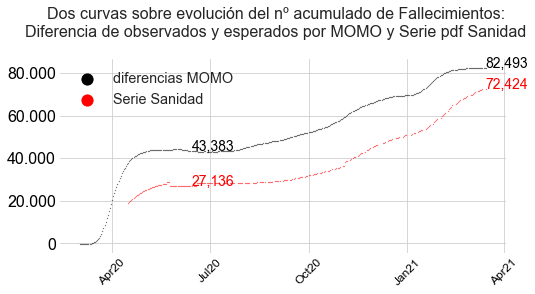

In [57]:
observadas = 'defunciones_observadas'
esperadas = 'defunciones_esperadas'
acum_obs = 'acum_observadas'
acum_esp = 'acum_esperadas'
fallecidos_sanidad = 'fallecidos_sanidad'


titulo = 'Dos curvas sobre evolución del nº acumulado de Fallecimientos:\n\
Diferencia de observados y esperados por MOMO y Serie pdf Sanidad'

color_titulos = 'black'
color_ejes='black'
color_linea1 ='black'
color_linea2='red'
colores = sns.color_palette("Blues_r", 5)

plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(8,4))
ax1 = f.add_subplot(1,1,1,)



ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_ejes)
ax1.xaxis.set_tick_params(labelsize=12,rotation=45,labelcolor=color_ejes,width=0)

ax1.scatter(fallecidos_completo_espanna['fecha'], 
            fallecidos_completo_espanna[acum_obs]-fallecidos_completo_espanna[acum_esp],s=.05,
            color=color_linea1,label='diferencias MOMO')

ax1.scatter(fallecidos_completo_espanna['fecha'], 
            fallecidos_completo_espanna[fallecidos_sanidad],s=.05,color=color_linea2,label='Serie Sanidad')

def y_fmt(x, y):
    return '{:0,.0f}'.format(x).replace(',', '.')

ax1.text(s='{:0,.0f}'.format(fallecidos_completo_espanna.iloc[-1][acum_obs]-fallecidos_completo_espanna.iloc[-1][acum_esp]), 
                x=fallecidos_completo_espanna.iloc[-1]['fecha'],
                y=fallecidos_completo_espanna.iloc[-1][acum_obs]-fallecidos_completo_espanna.iloc[-1][acum_esp],
                horizontalalignment='left',
                fontsize=14,color=color_linea1)


ax1.text(s='{:0,.0f}'.format(fallecidos_completo_espanna.iloc[-1][fallecidos_sanidad]), 
                x=fallecidos_completo_espanna.iloc[-1]['fecha'],
                y=fallecidos_completo_espanna.iloc[-1][fallecidos_sanidad],
                horizontalalignment='left',
                fontsize=14,color=color_linea2)
valores = fallecidos_completo_espanna.loc[fallecidos_completo_espanna['fecha']=='2020-6-14']
    
ax1.text(s='{:0,.0f}'.format(valores[acum_obs].values[0]-valores[acum_esp].values[0]), 
                x=valores['fecha'].values[0],
                y=valores[acum_obs].values[0]-valores[acum_esp].values[0],
                horizontalalignment='left',
                fontsize=14,color=color_linea1)


ax1.text(s='{:0,.0f}'.format(valores[fallecidos_sanidad].values[0]), 
                x=valores['fecha'].values[0],
                y=valores[fallecidos_sanidad].values[0],
                horizontalalignment='left',
                fontsize=14,color=color_linea2)
    
    
    
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax1.set_yticks([0,20000,40000,60000,80000])
XmajorFmt = DateFormatter('%-b%y')
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(MonthLocator([1,4,7,10]))
#ax1.set_xticks(ax1.get_xticks()[1:-1])

legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large',markerscale=50)

ax1.grid(True,axis='both')
f.suptitle(titulo,fontsize=16)

style = dict(size=20, color=color_titulos,weight='normal')
([spine.set_visible(False) for spine in ax1.spines.values()])
#f.tight_layout(top=.9,w_pad=0,h_pad=2)
f.subplots_adjust(top=.8,wspace=0.12,hspace=0.2)
#f.tight_layout()
f.savefig('img/MOMO_sanidad_total_1_Marzo.png',dpi=200,bbox_inches='tight')

# Vamos a analizar las diferencias por rangos de edades

In [457]:
row_momo

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-01,1283,1283.0,1283.000000,1201.5,1066.1,1592.50
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-02,1168,1168.0,1168.000000,1201.5,1066.1,1592.50
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-03,1219,1219.0,1219.000000,1200.5,1066.1,1590.85
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-04,1248,1248.0,1248.000000,1207.0,1066.1,1532.50
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-03-05,1229,1229.0,1229.000000,1207.0,1066.1,1503.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179755,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-03-14,0,0.0,0.164525,0.0,0.0,3.00
179756,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-03-15,1,1.0,1.228816,0.0,0.0,3.00
179757,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-03-16,0,0.0,0.336567,0.0,0.0,3.00
179758,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-03-17,0,0.0,1.697217,0.0,0.0,3.00


Vamos a hacerlo en primer lugaren España

In [458]:
datos = row_momo.loc[(row_momo['ambito']=='nacional') & (row_momo['nombre_sexo'] =='todos')]

In [459]:
datos.loc[:,'fecha_defuncion'] = pd.to_datetime(datos.loc[:,'fecha_defuncion'],format='%Y-%m-%d')

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


limitamos a un determinado rango de fechas

In [460]:
desde = datetime(year=2020,month=1,day=1)
hasta = datetime(year=2020,month=1,day=31)

In [428]:
datos = datos.loc[(datos['fecha_defuncion']>=desde) & (datos['fecha_defuncion']<=hasta),:]

In [461]:
datos = datos.loc[(datos['fecha_defuncion']>=desde)]

In [462]:
datos

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
306,nacional,NaN,NaN,NaN,all,todos,all,todos,2020-01-01,1159,1159.000000,1159.000000,1266.0,1108.10,1555.90
307,nacional,NaN,NaN,NaN,all,todos,all,todos,2020-01-02,1224,1224.000000,1224.000000,1281.0,1108.10,1633.16
308,nacional,NaN,NaN,NaN,all,todos,all,todos,2020-01-03,1226,1226.000000,1226.000000,1283.0,1108.10,1633.16
309,nacional,NaN,NaN,NaN,all,todos,all,todos,2020-01-04,1240,1240.000000,1240.000000,1291.0,1089.80,1633.16
310,nacional,NaN,NaN,NaN,all,todos,all,todos,2020-01-05,1197,1197.000000,1197.000000,1291.0,1092.90,1633.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,nacional,NaN,NaN,NaN,all,todos,mas_74,edad > 75,2021-03-14,779,752.535892,806.346175,849.0,757.90,1064.80
7486,nacional,NaN,NaN,NaN,all,todos,mas_74,edad > 75,2021-03-15,858,827.008184,890.943245,847.0,757.90,1140.77
7487,nacional,NaN,NaN,NaN,all,todos,mas_74,edad > 75,2021-03-16,877,831.622048,922.440493,841.5,757.90,1218.31
7488,nacional,NaN,NaN,NaN,all,todos,mas_74,edad > 75,2021-03-17,930,849.503675,1012.775081,847.0,757.90,1322.41


In [463]:
datos.groupby(['fecha_defuncion','nombre_gedad']).sum().reset_index()

,fecha_defuncion,nombre_gedad,cod_ine_ambito,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,2020-01-01,edad 65-74,0.0,170,170.000000,170.000000,170.00,140.000,204.14
1,2020-01-01,edad < 65,0.0,163,163.000000,163.000000,171.00,138.240,204.76
2,2020-01-01,edad > 75,0.0,826,826.000000,826.000000,928.00,776.960,1168.02
3,2020-01-01,todos,0.0,1159,1159.000000,1159.000000,1266.00,1108.100,1555.90
4,2020-01-02,edad 65-74,0.0,173,173.000000,173.000000,170.00,140.310,204.14
...,...,...,...,...,...,...,...,...,...
1767,2021-03-17,todos,0.0,1261,1163.391679,1359.876370,1164.00,1040.530,1756.65
1768,2021-03-18,edad 65-74,0.0,157,126.197766,189.130238,156.75,116.415,268.27
1769,2021-03-18,edad < 65,0.0,172,141.370377,202.923323,162.00,129.450,220.48
1770,2021-03-18,edad > 75,0.0,878,693.502758,1062.415339,847.50,743.560,1438.06


In [464]:
for i in datos['nombre_gedad'].unique():
    datos.loc[datos['nombre_gedad'] == i,acum_esp] = datos.loc[datos['nombre_gedad'] == i,esperadas].cumsum().copy()
    datos.loc[datos['nombre_gedad'] == i,acum_obs] = datos.loc[datos['nombre_gedad'] == i,observadas].cumsum().copy()
    datos.loc[datos['nombre_gedad'] == i,'diferencia'] = datos.loc[datos['nombre_gedad'] == i,acum_obs]-datos.loc[datos['nombre_gedad'] == i,acum_esp]

In [465]:
datos = datos[['nombre_gedad','fecha_defuncion',observadas,esperadas,acum_obs,acum_esp,'diferencia']]

In [466]:
datos

,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_esperadas,acum_observadas,acum_esperadas,diferencia
306,todos,2020-01-01,1159,1266.0,1159.0,1266.0,-107.0
307,todos,2020-01-02,1224,1281.0,2383.0,2547.0,-164.0
308,todos,2020-01-03,1226,1283.0,3609.0,3830.0,-221.0
309,todos,2020-01-04,1240,1291.0,4849.0,5121.0,-272.0
310,todos,2020-01-05,1197,1291.0,6046.0,6412.0,-366.0
...,...,...,...,...,...,...,...
7485,edad > 75,2021-03-14,779,849.0,417926.0,353785.0,64141.0
7486,edad > 75,2021-03-15,858,847.0,418784.0,354632.0,64152.0
7487,edad > 75,2021-03-16,877,841.5,419661.0,355473.5,64187.5
7488,edad > 75,2021-03-17,930,847.0,420591.0,356320.5,64270.5


In [467]:
datos

,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_esperadas,acum_observadas,acum_esperadas,diferencia
306,todos,2020-01-01,1159,1266.0,1159.0,1266.0,-107.0
307,todos,2020-01-02,1224,1281.0,2383.0,2547.0,-164.0
308,todos,2020-01-03,1226,1283.0,3609.0,3830.0,-221.0
309,todos,2020-01-04,1240,1291.0,4849.0,5121.0,-272.0
310,todos,2020-01-05,1197,1291.0,6046.0,6412.0,-366.0
...,...,...,...,...,...,...,...
7485,edad > 75,2021-03-14,779,849.0,417926.0,353785.0,64141.0
7486,edad > 75,2021-03-15,858,847.0,418784.0,354632.0,64152.0
7487,edad > 75,2021-03-16,877,841.5,419661.0,355473.5,64187.5
7488,edad > 75,2021-03-17,930,847.0,420591.0,356320.5,64270.5


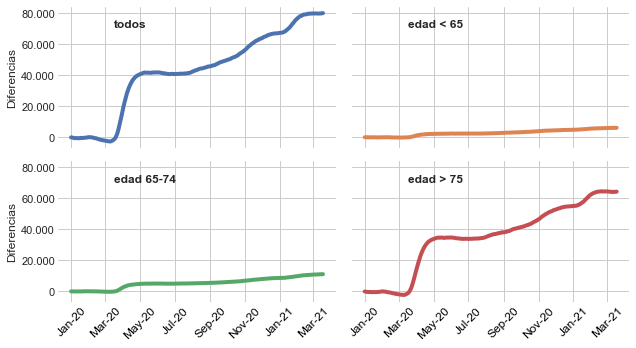

In [468]:
import seaborn as sns
color_ejes='black'

sns.set_theme(style="dark")
plt.style.use('seaborn-white')


# Plot each year's time series in its own facet
g = sns.relplot(
    data=datos,
    x="fecha_defuncion", y="diferencia", col="nombre_gedad", hue="nombre_gedad",
    kind="line", linewidth=4, zorder=5,
    col_wrap=2, height=2.5, aspect=1.8, legend=False
)
XmajorFmt = DateFormatter('%-b-%-y')

# Iterate over each subplot to customize further
for rango, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.2, .85, rango, transform=ax.transAxes, fontweight="bold")
    #ax.yaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes,pad=-5)
    #ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=45)
    ax.xaxis.set_major_formatter(XmajorFmt)
    
    def y_fmt(x, y):
        return '{:0,.0f}'.format(x).replace(',', '.')


    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    
    ax.grid(True,axis='both',which='both')
    ([spine.set_visible(False) for spine in ax.spines.values()])
    # Plot every year's time series in the background
    ''' sns.lineplot(
        data=datos, x="fecha_defuncion", y="diferencia", units="nombre_gedad",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )
    ''' 

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Diferencias")
g.tight_layout()

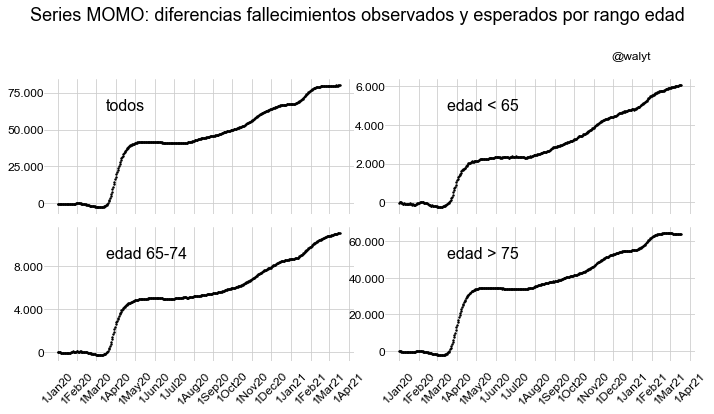

In [469]:
# Creamos la figura desde Matplotlib
#plt.figure()

color_observadas = 'black'
color_esperadas = 'grey'
color_sanidad = 'red'
colores = sns.color_palette("Blues_r", 5)
color_ejes ='black'
color_titulos = 'black'
titulo = 'Series MOMO: diferencias fallecimientos observados y esperados por rango edad'


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='nombre_gedad',hue='nombre_gedad',col_wrap=2,aspect=1.8, 
                      margin_titles=False,height=2.8,sharey=False)

# Título


#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d%-b%y')
def grafica(x, color, label):
    ax1 = plt.gca()
    ax1.xaxis_date()
    df_datos= datos.loc[datos['nombre_gedad'] == label].copy()
    
    ax1.text(0.2, .8, label, fontweight="light", color=color_titulos,
            ha="left", va="center", size=16,transform=ax1.transAxes)
    #ax1.set_ylim(0,1000)
    #ax1.set_yticks([0,250,500,750,1000])
    
    def y_fmt(x, y):
        return '{:0,.0f}'.format(x).replace(',', '.')


    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    
    
    
    #ax1.set_yticks([])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,pad=-5)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.scatter(df_datos['fecha_defuncion'], df_datos['diferencia'],s=2,color=color_observadas)
    
g.map(grafica,'nombre_gedad')


g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')


g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=18,color=color_titulos)
g.fig.subplots_adjust(top=.8,bottom=.1,wspace=0.1,hspace=0.1)

g.fig.text(x=.85,y=.85,s='@walyt',color=color_ejes,fontsize=12)

plt.savefig('img/momo_diferencias_edad.png',dpi=288)  
#plt.tight_layout()
plt.show()


In [470]:
 datos_1 = datos.loc[(datos['fecha_defuncion']>datetime(year=2021,month=1,day=1)) & (datos['nombre_gedad']=='edad > 75')]

In [471]:
datos_1

,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_esperadas,acum_observadas,acum_esperadas,diferencia
7414,edad > 75,2021-01-02,960,929.25,342860.0,287763.75,55096.25
7415,edad > 75,2021-01-03,938,940.75,343798.0,288704.50,55093.50
7416,edad > 75,2021-01-04,987,947.50,344785.0,289652.00,55133.00
7417,edad > 75,2021-01-05,1004,948.00,345789.0,290600.00,55189.00
7418,edad > 75,2021-01-06,1021,952.50,346810.0,291552.50,55257.50
...,...,...,...,...,...,...,...
7485,edad > 75,2021-03-14,779,849.00,417926.0,353785.00,64141.00
7486,edad > 75,2021-03-15,858,847.00,418784.0,354632.00,64152.00
7487,edad > 75,2021-03-16,877,841.50,419661.0,355473.50,64187.50
7488,edad > 75,2021-03-17,930,847.00,420591.0,356320.50,64270.50


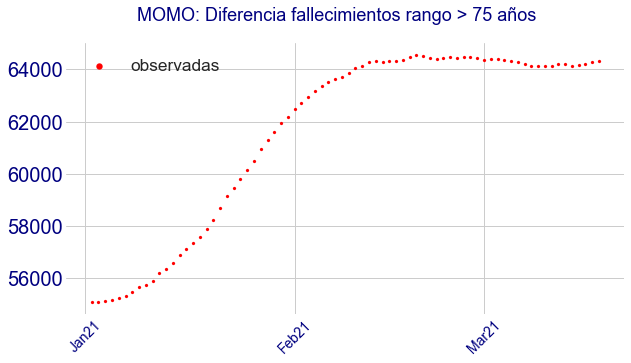

In [472]:
color_titulos = 'navy'
colores = sns.color_palette("Blues_r", 5)

plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(1,1,1,)


#colors = cm.RdYlBu_r(datos[casos_nuevos]/datos[casos_nuevos].max())


#ax1.fill_between(datos['date'],datos[IA],color='navy',lw=5,alpha=.3)

ax1.yaxis.set_tick_params(labelsize=20,labelcolor='navy')
ax1.xaxis.set_tick_params(labelsize=14,rotation=45,labelcolor='navy',width=0)
#ax1.set_title(titulo_IA,size=20,color='navy')
ax1.scatter(datos_1['fecha_defuncion'],datos_1['diferencia'],color='red',s=10,lw=.05,label='observadas')

#ax1.plot(momo_ccaa['fecha_defuncion'],momo_ccaa[observadas],color='red',lw=.5,label='ratio ia14 a 7 días')
#ax2.plot(datos['date'],datos[clave_ratio],color='red',lw=.5,label='ratio ia14 a 7 días')

fmt = '%00.0f' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
#ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

XmajorFmt = DateFormatter('%-b%y')
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(DayLocator([1]))
#ax1.set_xticks(ax1.get_xticks()[1:-1])

legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large',markerscale=2)

ax1.grid(True,axis='both')
f.suptitle('MOMO: Diferencia fallecimientos rango > 75 años',fontsize=18,color='navy')
style = dict(size=20, color=color_titulos,weight='normal')
([spine.set_visible(False) for spine in ax1.spines.values()])

#f.tight_layout(w_pad=0,h_pad=2,pad=1)

#f.tight_layout()
f.savefig('img/momo_zoom_dif_mayores.png',dpi=200,bbox_inches='tight')